In [ ]:
#import pandas & numpy
import pandas as pd 
import numpy as np 

#read the nifty50 csv file into a dataframe df
df = pd.read_csv("nifty50 (1).csv")

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving nifty50 (1).csv to nifty50 (1).csv


In [ ]:
#print df
df

,Date,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,TATASTEEL.NS,NTPC.NS,CIPLA.NS,ITC.NS,BPCL.NS,WIPRO.NS,JSWSTEEL.NS,GAIL.NS,DIVISLAB.NS,ULTRACEMCO.NS,NESTLEIND.NS,ASIANPAINT.NS,EICHERMOT.NS,IOC.NS,GRASIM.NS,BAJAJ-AUTO.NS,HDFC.NS,M&M.NS,UPL.NS,SHREECEM.NS,MARUTI.NS,TITAN.NS,BAJAJFINSV.NS,KOTAKBANK.NS,COALINDIA.NS,BHARTIARTL.NS,HEROMOTOCO.NS,LT.NS,ONGC.NS,SBIN.NS,RELIANCE.NS,SBILIFE.NS,HDFCLIFE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,245.233993,120.417,655.349976,218.332993,298.683014,208.669006,102.699997,103.991997,1162.500000,2824.000000,5785.149902,878.750000,1737.079956,108.311997,583.687012,2518.000000,1258.449951,632.674988,293.566986,11383.5000,4638.500000,352.049988,1983.800049,727.250000,334.049988,312.640015,2686.050049,859.466980,161.667007,227.800003,507.674988,NaN,NaN,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
1,04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,244.757996,119.417,645.650024,216.733002,297.149994,209.138000,104.470001,101.194000,1149.699951,2749.149902,5669.799805,880.799988,1749.530029,106.612999,566.568970,2483.350098,1216.699951,621.250000,289.233002,11059.2998,4580.649902,351.399994,1959.500000,705.299988,330.200012,300.061005,2637.800049,837.299988,158.699997,220.699997,497.649994,NaN,NaN,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2,05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,261.335998,118.542,640.849976,216.567001,300.882996,208.837997,108.309998,104.695000,1147.500000,2733.050049,5662.399902,900.650024,1715.989990,110.662003,566.854981,2502.350098,1209.400024,624.599976,290.200012,11124.2998,4566.950195,347.700012,1946.000000,707.750000,325.799988,296.984985,2616.850098,837.932983,161.233002,217.750000,502.575012,NaN,NaN,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
3,06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,256.048004,117.875,652.099976,210.067001,304.100006,208.162994,105.820000,104.821999,1137.199951,2735.300049,5719.500000,886.400024,1752.510010,112.712997,565.817993,2485.500000,1209.300049,613.075012,295.566986,11452.2998,4480.799805,347.850006,1938.550049,703.599976,327.899994,295.837006,2578.199951,824.567017,158.367004,216.850006,516.099976,NaN,NaN,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
4,07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,238.089004,114.875,637.450012,206.399994,294.750000,206.194000,102.635002,104.231003,1126.949951,2667.699951,5638.950195,872.349976,1703.560059,110.387001,551.068970,2419.250000,1179.449951,598.724976,278.266998,10979.0000,4267.899902,344.049988,1927.050049,691.650024,326.399994,295.975006,2520.100098,804.267029,151.067001,209.550003,506.625000,NaN,NaN,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1279,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
#drop stock columns of "SBILIFE.NS" & "HDFCLIFE.NS"
df = df.drop(["SBILIFE.NS","HDFCLIFE.NS"],axis=1)

#drop null values if any exist 
df.dropna(inplace =True)

#print df 
df

,Date,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,TATASTEEL.NS,NTPC.NS,CIPLA.NS,ITC.NS,BPCL.NS,WIPRO.NS,JSWSTEEL.NS,GAIL.NS,DIVISLAB.NS,ULTRACEMCO.NS,NESTLEIND.NS,ASIANPAINT.NS,EICHERMOT.NS,IOC.NS,GRASIM.NS,BAJAJ-AUTO.NS,HDFC.NS,M&M.NS,UPL.NS,SHREECEM.NS,MARUTI.NS,TITAN.NS,BAJAJFINSV.NS,KOTAKBANK.NS,COALINDIA.NS,BHARTIARTL.NS,HEROMOTOCO.NS,LT.NS,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
0,01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,245.233993,120.417000,655.349976,218.332993,298.683014,208.669006,102.699997,103.991997,1162.500000,2824.000000,5785.149902,878.750000,1737.079956,108.311997,583.687012,2518.000000,1258.449951,632.674988,293.566986,11383.50000,4638.500000,352.049988,1983.800049,727.250000,334.049988,312.640015,2686.050049,859.466980,161.667007,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
1,04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,244.757996,119.417000,645.650024,216.733002,297.149994,209.138000,104.470001,101.194000,1149.699951,2749.149902,5669.799805,880.799988,1749.530029,106.612999,566.568970,2483.350098,1216.699951,621.250000,289.233002,11059.29980,4580.649902,351.399994,1959.500000,705.299988,330.200012,300.061005,2637.800049,837.299988,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
2,05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,261.335998,118.542000,640.849976,216.567001,300.882996,208.837997,108.309998,104.695000,1147.500000,2733.050049,5662.399902,900.650024,1715.989990,110.662003,566.854981,2502.350098,1209.400024,624.599976,290.200012,11124.29980,4566.950195,347.700012,1946.000000,707.750000,325.799988,296.984985,2616.850098,837.932983,161.233002,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
3,06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,256.048004,117.875000,652.099976,210.067001,304.100006,208.162994,105.820000,104.821999,1137.199951,2735.300049,5719.500000,886.400024,1752.510010,112.712997,565.817993,2485.500000,1209.300049,613.075012,295.566986,11452.29980,4480.799805,347.850006,1938.550049,703.599976,327.899994,295.837006,2578.199951,824.567017,158.367004,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
4,07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,238.089004,114.875000,637.450012,206.399994,294.750000,206.194000,102.635002,104.231003,1126.949951,2667.699951,5638.950195,872.349976,1703.560059,110.387001,551.068970,2419.250000,1179.449951,598.724976,278.266998,10979.00000,4267.899902,344.049988,1927.050049,691.650024,326.399994,295.975006,2520.100098,804.267029,151.067001,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,24-12-2020,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,622.299988,99.949997,833.200012,208.600006,377.549988,382.200012,366.250000,120.150001,3749.600098,5044.750000,18566.300780,2648.250000,2436.750000,90.250000,897.150024,3374.750000,2455.149902,710.900024,449.399994,23826.80078,7446.049805,1495.900024,8992.549805,1960.599976,136.250000,517.299988,3073.100098,1262.199951,93.150002,266.850006,1994.150024,5184.899902,61

In [ ]:
#reset index to date using set_index function 
df = df.set_index("Date")

#print df
df1 = df.copy()
df

,ADANIPORTS.NS,TECHM.NS,BRITANNIA.NS,TCS.NS,SUNPHARMA.NS,INFY.NS,HINDALCO.NS,DRREDDY.NS,HCLTECH.NS,HINDUNILVR.NS,TATASTEEL.NS,NTPC.NS,CIPLA.NS,ITC.NS,BPCL.NS,WIPRO.NS,JSWSTEEL.NS,GAIL.NS,DIVISLAB.NS,ULTRACEMCO.NS,NESTLEIND.NS,ASIANPAINT.NS,EICHERMOT.NS,IOC.NS,GRASIM.NS,BAJAJ-AUTO.NS,HDFC.NS,M&M.NS,UPL.NS,SHREECEM.NS,MARUTI.NS,TITAN.NS,BAJAJFINSV.NS,KOTAKBANK.NS,COALINDIA.NS,BHARTIARTL.NS,HEROMOTOCO.NS,LT.NS,ONGC.NS,SBIN.NS,RELIANCE.NS,BAJFINANCE.NS,AXISBANK.NS,HDFCBANK.NS,TATAMOTORS.NS,ICICIBANK.NS,POWERGRID.NS,INDUSINDBK.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01-01-2016,267.549988,520.049988,1493.199951,1208.199951,815.549988,552.625000,84.900002,3108.600098,422.924988,856.549988,245.233993,120.417000,655.349976,218.332993,298.683014,208.669006,102.699997,103.991997,1162.500000,2824.000000,5785.149902,878.750000,1737.079956,108.311997,583.687012,2518.000000,1258.449951,632.674988,293.566986,11383.50000,4638.500000,352.049988,1983.800049,727.250000,334.049988,312.640015,2686.050049,859.466980,161.667007,227.800003,507.674988,609.585022,449.899994,544.375000,401.899994,239.091003,141.000000,963.849976
04-01-2016,257.950012,516.400024,1486.300049,1184.800049,799.099976,539.450012,80.750000,3056.000000,422.975006,859.000000,244.757996,119.417000,645.650024,216.733002,297.149994,209.138000,104.470001,101.194000,1149.699951,2749.149902,5669.799805,880.799988,1749.530029,106.612999,566.568970,2483.350098,1216.699951,621.250000,289.233002,11059.29980,4580.649902,351.399994,1959.500000,705.299988,330.200012,300.061005,2637.800049,837.299988,158.699997,220.699997,497.649994,605.244995,438.399994,535.250000,377.049988,232.317993,140.949997,934.200012
05-01-2016,255.699997,521.900024,1483.349976,1174.469971,800.500000,537.025024,82.599998,3070.649902,421.399994,847.950012,261.335998,118.542000,640.849976,216.567001,300.882996,208.837997,108.309998,104.695000,1147.500000,2733.050049,5662.399902,900.650024,1715.989990,110.662003,566.854981,2502.350098,1209.400024,624.599976,290.200012,11124.29980,4566.950195,347.700012,1946.000000,707.750000,325.799988,296.984985,2616.850098,837.932983,161.233002,217.750000,502.575012,599.784973,436.450012,531.200012,374.450012,233.363998,139.149994,935.250000
06-01-2016,251.800003,525.099976,1500.849976,1190.800049,791.950012,534.674988,80.550003,3046.250000,420.700012,843.049988,256.048004,117.875000,652.099976,210.067001,304.100006,208.162994,105.820000,104.821999,1137.199951,2735.300049,5719.500000,886.400024,1752.510010,112.712997,565.817993,2485.500000,1209.300049,613.075012,295.566986,11452.29980,4480.799805,347.850006,1938.550049,703.599976,327.899994,295.837006,2578.199951,824.567017,158.367004,216.850006,516.099976,610.724976,430.700012,533.549988,365.899994,227.363998,139.500000,943.950012
07-01-2016,245.000000,510.799988,1473.280029,1185.619995,783.799988,525.400024,76.650002,2991.800049,412.524994,820.250000,238.089004,114.875000,637.450012,206.399994,294.750000,206.194000,102.635002,104.231003,1126.949951,2667.699951,5638.950195,872.349976,1703.560059,110.387001,551.068970,2419.250000,1179.449951,598.724976,278.266998,10979.00000,4267.899902,344.049988,1927.050049,691.650024,326.399994,295.975006,2520.100098,804.267029,151.067001,209.550003,506.625000,610.630005,409.250000,528.099976,343.549988,224.317993,138.100006,925.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-12-2020,478.549988,947.250000,3618.250000,2909.350098,590.450012,1236.050049,236.949997,5201.799805,919.349976,2402.250000,622.299988,99.949997,833.200012,208.600006,377.549988,382.200012,366.250000,120.150001,3749.600098,5044.750000,18566.300780,2648.250000,2436.750000,90.250000,897.150024,3374.750000,2455.149902,710.900024,449.399994,23826.80078,7446.049805,1495.900024,8992.549805,1960.599976,136.250000,517.299988,3073.100098,1262.199951,93.150002,266.8500

In [ ]:
name = list(df)
name

['ADANIPORTS.NS',
 'TECHM.NS',
 'BRITANNIA.NS',
 'TCS.NS',
 'SUNPHARMA.NS',
 'INFY.NS',
 'HINDALCO.NS',
 'DRREDDY.NS',
 'HCLTECH.NS',
 'HINDUNILVR.NS',
 'TATASTEEL.NS',
 'NTPC.NS',
 'CIPLA.NS',
 'ITC.NS',
 'BPCL.NS',
 'WIPRO.NS',
 'JSWSTEEL.NS',
 'GAIL.NS',
 'DIVISLAB.NS',
 'ULTRACEMCO.NS',
 'NESTLEIND.NS',
 'ASIANPAINT.NS',
 'EICHERMOT.NS',
 'IOC.NS',
 'GRASIM.NS',
 'BAJAJ-AUTO.NS',
 'HDFC.NS',
 'M&M.NS',
 'UPL.NS',
 'SHREECEM.NS',
 'MARUTI.NS',
 'TITAN.NS',
 'BAJAJFINSV.NS',
 'KOTAKBANK.NS',
 'COALINDIA.NS',
 'BHARTIARTL.NS',
 'HEROMOTOCO.NS',
 'LT.NS',
 'ONGC.NS',
 'SBIN.NS',
 'RELIANCE.NS',
 'BAJFINANCE.NS',
 'AXISBANK.NS',
 'HDFCBANK.NS',
 'TATAMOTORS.NS',
 'ICICIBANK.NS',
 'POWERGRID.NS',
 'INDUSINDBK.NS']

In [ ]:
def CAGR(df,name):
    
    #USING df[name] and iloc function, identify the initial price of stock 
    start_value = df[name].iloc[0]
    
    #Like we did for Start Value, USING df[name] and iloc function, identify the final price of stock 
    end_value = df[name].iloc[-1]
    
    #Specify the Number of years we are taking into account 
    n = 5
    
    #WRITE THE CAGR FUNCTION USING START VALUE, END VALUE AND NUMBER OF PERIODS
    cagr = (end_value/start_value)**(1/n) -1 
    
    return cagr

In [ ]:
def volatility(df,name):
    df[name] = df[name].pct_change()
    vol = df[name].std(ddof=0) * np.sqrt(252)
    return vol

In [ ]:
def sharpe(x,y,rf):
    
    #Write down the Sharpe Ratio formula using CAGR, Volatility and Risk-Free rate
    sr = (x - 0.06)/y
    
    return sr

In [ ]:
cagr = []
vol = []
sr = []
rf = 0.06
for i in range(len(name)):
    x = CAGR(df, name[i])
    y = volatility(df, name[i])
    z = sharpe(x,y,rf)
    cagr.append(x)
    vol.append(y)
    sr.append(z)

#PRINT CAGR, VOL, SR LIST
print(sr)

[0.18068245477048975, 0.23772640580515617, 0.4918751866486566, 0.49461919141633914, -0.36961621138164813, 0.4157060550580363, 0.4104646748914801, 0.1663676075912103, 0.41434475141306476, 0.7160329573311028, 0.3992257748630759, -0.371862806099429, -0.05004698085182572, -0.249487133783008, -0.02592969421681889, 0.27573429619633294, 0.6740290736724791, -0.07533354796957267, 0.5875533268898606, 0.25488084248231957, 0.7959769550066873, 0.7706575605456922, 0.052755158377256944, -0.2844876958908887, 0.11137706066041986, 0.01775305846248442, 0.30947275175411393, -0.10484788634761683, 0.09974581738352396, 0.33368316667886433, 0.14378562456984884, 0.8446366391063602, 0.7895699676143428, 0.5764548757620351, -0.766725814085621, 0.12349731204063494, -0.0988518651590619, 0.08372993852569964, -0.4679595031845641, -0.056444278375967515, 0.8234749651084392, 1.149947985638071, 0.01663937473646884, 0.651620848687381, -0.42528123168683873, 0.31204936060462796, 0.005358393500279929, -0.15840154869587744]


#### IDENTIFY THE TOP 15 STOCKS LOOKING AT THE SHARPE RATIO LIST AND MAKE A LIST OF THE STOCK NAMES

In [ ]:
df0 = pd.DataFrame(name)
df0["Sharpe Ratio"] = sr 
#Top_15 = sr.sort_values(ascending = False).head(15)

In [ ]:
df0.sort_values(by = "Sharpe Ratio", ascending = False, inplace = True)

In [ ]:
top_15 = df0.head(15)
top_15

,0,Sharpe Ratio
41,BAJFINANCE.NS,1.149948
31,TITAN.NS,0.844637
40,RELIANCE.NS,0.823475
20,NESTLEIND.NS,0.795977
32,BAJAJFINSV.NS,0.789570
21,ASIANPAINT.NS,0.770658
9,HINDUNILVR.NS,0.716033
16,JSWSTEEL.NS,0.674029
43,HDFCBANK.NS,0.651621
18,DIVISLAB.NS,0.587553


In [ ]:
newlist = top_15[0].tolist()
newlist

['BAJFINANCE.NS',
 'TITAN.NS',
 'RELIANCE.NS',
 'NESTLEIND.NS',
 'BAJAJFINSV.NS',
 'ASIANPAINT.NS',
 'HINDUNILVR.NS',
 'JSWSTEEL.NS',
 'HDFCBANK.NS',
 'DIVISLAB.NS',
 'KOTAKBANK.NS',
 'TCS.NS',
 'BRITANNIA.NS',
 'INFY.NS',
 'HCLTECH.NS']

In [ ]:
df2 = pd.DataFrame()
for i in range(len(newlist)):
    df2[newlist[i]] = df1[newlist[i]]
    
df2

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
Date,,,,,,,,,,,,,,,
01-01-2016,609.585022,352.049988,507.674988,5785.149902,1983.800049,878.750000,856.549988,102.699997,544.375000,1162.500000,727.250000,1208.199951,1493.199951,552.625000,422.924988
04-01-2016,605.244995,351.399994,497.649994,5669.799805,1959.500000,880.799988,859.000000,104.470001,535.250000,1149.699951,705.299988,1184.800049,1486.300049,539.450012,422.975006
05-01-2016,599.784973,347.700012,502.575012,5662.399902,1946.000000,900.650024,847.950012,108.309998,531.200012,1147.500000,707.750000,1174.469971,1483.349976,537.025024,421.399994
06-01-2016,610.724976,347.850006,516.099976,5719.500000,1938.550049,886.400024,843.049988,105.820000,533.549988,1137.199951,703.599976,1190.800049,1500.849976,534.674988,420.700012
07-01-2016,610.630005,344.049988,506.625000,5638.950195,1927.050049,872.349976,820.250000,102.635002,528.099976,1126.949951,691.650024,1185.619995,1473.280029,525.400024,412.524994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24-12-2020,5184.899902,1495.900024,1994.150024,18566.300780,8992.549805,2648.250000,2402.250000,366.250000,1397.099976,3749.600098,1960.599976,2909.350098,3618.250000,1236.050049,919.349976
28-12-2020,5204.100098,1543.550049,2003.300049,18597.300780,8995.049805,2683.899902,2388.899902,386.600006,1412.849976,3766.000000,1988.900024,2929.399902,3603.550049,1240.300049,921.799988
29-12-2020,5200.500000,1540.099976,1990.050049,18262.699220,8976.049805,2696.800049,2384.300049,381.799988,1427.199951,3784.199951,1999.300049,2930.500000,3593.300049,1250.300049,935.900024


In [ ]:
df3 = pd.DataFrame()
for i in range(len(newlist)):
    b = []
    b.append(np.nan)
    for j in range(df2.shape[0] - 1):
        b.append(np.log(df1[newlist[i]][j+1]/df1[newlist[i]][j]))
    df3[newlist[i]] = b
    
df3 = df3.iloc[1:]
df3

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS
1,-0.007145,-0.001848,-0.019944,-0.020140,-0.012325,0.002330,0.002856,0.017088,-0.016904,-0.011072,-0.030647,-0.019558,-0.004632,-0.024130,0.000118
2,-0.009062,-0.010585,0.009848,-0.001306,-0.006913,0.022286,-0.012947,0.036098,-0.007595,-0.001915,0.003468,-0.008757,-0.001987,-0.004505,-0.003731
3,0.018076,0.000431,0.026556,0.010034,-0.003836,-0.015948,-0.005795,-0.023258,0.004414,-0.009017,-0.005881,0.013808,0.011729,-0.004386,-0.001662
4,-0.000156,-0.010984,-0.018529,-0.014183,-0.005950,-0.015978,-0.027417,-0.030561,-0.010267,-0.009054,-0.017130,-0.004360,-0.018540,-0.017499,-0.019623
5,0.033528,0.011416,0.012261,-0.001136,0.037357,0.002576,-0.012760,0.014317,0.005806,0.002437,0.004976,0.011055,-0.015135,0.011826,0.003992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0.018689,0.003382,0.025547,-0.008922,-0.002299,0.002155,0.013368,-0.001637,0.015472,0.016402,0.020535,0.000206,-0.001960,-0.013660,-0.003529
1228,0.003696,0.031357,0.004578,0.001668,0.000278,0.013372,-0.005573,0.054074,0.011210,0.004364,0.014331,0.006868,-0.004071,0.003432,0.002661
1229,-0.000692,-0.002238,-0.006636,-0.018156,-0.002115,0.004795,-0.001927,-0.012494,0.010106,0.004821,0.005215,0.000375,-0.002848,0.008030,0.015180
1230,0.025375,0.008084,0.002735,0.006359,-0.001600,0.013846,0.009309,0.011200,0.003707,0.004088,0.009285,-0.007261,-0.002619,-0.002803,0.005116


In [ ]:
np.random.seed(42)
num_ports = 6000*4
all_weights = np.zeros((num_ports, df3.shape[1]))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    if x%6000 == 0:
        print(x)
    # Weights
    weights = np.array(np.random.random(df3.shape[1]))
    weights = weights/np.sum(weights)
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum((df3.mean() * weights*252))
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

0
6000
12000
18000


In [ ]:
sharpe_arr.max()

1.426601575120596

In [ ]:
sharpe_arr.max()
p = sharpe_arr.argmax()
print(all_weights[p,:])

[0.06516966 0.11141251 0.11162239 0.10658137 0.00562533 0.09722438
 0.12070703 0.04705003 0.08161293 0.08447607 0.00676852 0.10928538
 0.02052385 0.00477375 0.0271668 ]


In [ ]:
mr = ret_arr[p]
mv = vol_arr[p]

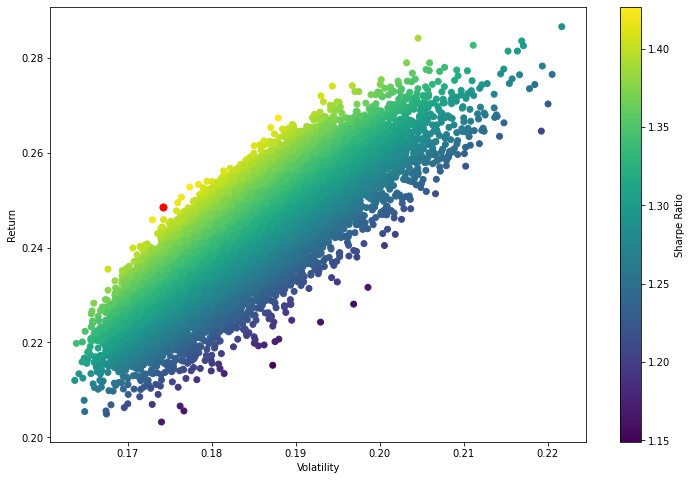

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(mv, mr,c='red', s=50) # red dot
plt.show()

In [ ]:
fy = np.linspace(0.2,0.35,50)

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(df3.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(df3.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def min_vol(weights):
    return get_ret_vol_sr(weights)[1]

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [ ]:
a = 1/15
c = ((0,1),)
b = []
d = ()
for i in range(15):
    b.append(a)
    d = d+c

In [ ]:
from scipy.optimize import minimize
fx = []

for i in fy:
    print(i)
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - i})
    
    result = minimize(min_vol, b, method='SLSQP', bounds=d, constraints=cons)
    fx.append(result['fun'])   

0.2
0.20306122448979594
0.20612244897959184
0.20918367346938777
0.2122448979591837
0.2153061224489796
0.21836734693877552
0.22142857142857145
0.22448979591836735
0.22755102040816327
0.23061224489795917
0.2336734693877551
0.23673469387755103
0.23979591836734693
0.24285714285714285
0.24591836734693878
0.24897959183673468
0.25204081632653064
0.25510204081632654
0.25816326530612244
0.2612244897959184
0.2642857142857143
0.2673469387755102
0.27040816326530615
0.27346938775510204
0.27653061224489794
0.2795918367346939
0.2826530612244898
0.2857142857142857
0.28877551020408165
0.29183673469387755
0.29489795918367345
0.2979591836734694
0.3010204081632653
0.3040816326530612
0.30714285714285716
0.31020408163265306
0.31326530612244896
0.3163265306122449
0.3193877551020408
0.3224489795918367
0.32551020408163267
0.32857142857142857
0.33163265306122447
0.3346938775510204
0.3377551020408163
0.3408163265306122
0.3438775510204082
0.3469387755102041
0.35


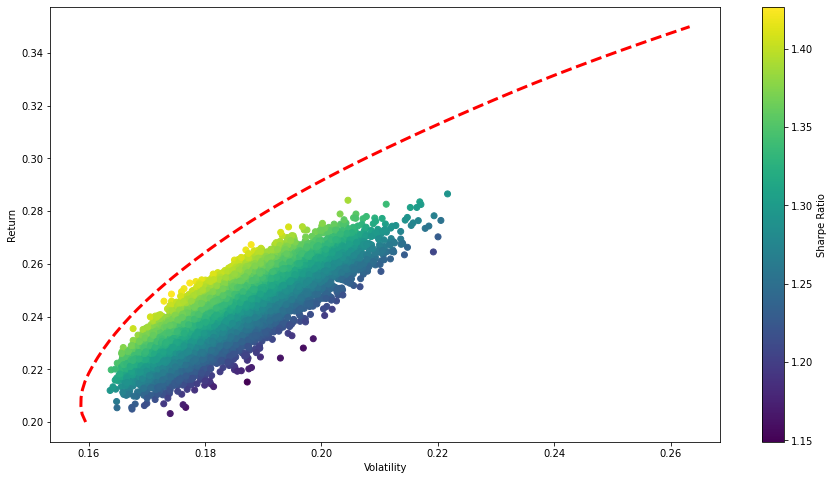

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(fx,fy, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

In [ ]:
mon = all_weights[p,:]*1e7
mon


array([ 651696.64729113, 1114125.05281609, 1116223.88059628,
       1065813.68332609,   56253.29833507,  972243.79089519,
       1207070.33087505,  470500.32407491,  816129.29648922,
        844760.72364126,   67685.21033186, 1092853.81937264,
        205238.48246742,   47737.48553509,  271667.9739527 ])

In [ ]:
num_sto = []
for i in range(len(mon)):
    num_sto.append(mon[i]/df2[newlist[i]][-1])

In [ ]:
num_sto

[123.0730894568438,
 710.9243121296025,
 562.2444230324378,
 57.95552677683794,
 6.316089172855502,
 351.6888373648718,
 503.91182276797457,
 1215.1350962041913,
 568.2164371277667,
 219.88098211551434,
 33.91722346456026,
 381.74965308624394,
 57.38769327482534,
 38.0136038162335,
 287.12991274822053]

In [ ]:
newlist

['BAJFINANCE.NS',
 'TITAN.NS',
 'RELIANCE.NS',
 'NESTLEIND.NS',
 'BAJAJFINSV.NS',
 'ASIANPAINT.NS',
 'HINDUNILVR.NS',
 'JSWSTEEL.NS',
 'HDFCBANK.NS',
 'DIVISLAB.NS',
 'KOTAKBANK.NS',
 'TCS.NS',
 'BRITANNIA.NS',
 'INFY.NS',
 'HCLTECH.NS']

In [ ]:
DF = pd.DataFrame()
DF["Name"] = newlist
DF["No. of shares"] = num_sto
DF

,Name,No. of shares
0,BAJFINANCE.NS,123.073089
1,TITAN.NS,710.924312
2,RELIANCE.NS,562.244423
3,NESTLEIND.NS,57.955527
4,BAJAJFINSV.NS,6.316089
5,ASIANPAINT.NS,351.688837
6,HINDUNILVR.NS,503.911823
7,JSWSTEEL.NS,1215.135096
8,HDFCBANK.NS,568.216437
9,DIVISLAB.NS,219.880982


In [ ]:
import pandas_datareader.data as pdr
import datetime as dt
from statistics import stdev

In [ ]:
fin = dt.datetime(2021, 6, 30)
ini = dt.datetime(2021, 1, 1)

In [ ]:
newdf = pd.DataFrame()
!pip install yfinance
import yfinance as yf 

yf.pdr_override()

newdf = pd.DataFrame()
for i in range(len(newlist)):
    try:
        o = pdr.get_data_yahoo(newlist[i],ini,fin)
        newdf[str(newlist[i])] = o["Close"]
    except:
        print('error')
        print(i)
o = pdr.get_data_yahoo('^NSEI',ini,fin)
newdf['Nifty50'] = o["Close"]

     |████████████████████████████████| 6.3MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=76de7660f6ddd05b8ba320809731b24bb6a456ed8f1022f6a2ecc0b4493f0863
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 o

In [ ]:
newdf

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS,Nifty50
Date,,,,,,,,,,,,,,,,
2021-01-01,5280.149902,1558.599976,1987.500000,18450.699219,8870.450195,2775.550049,2387.550049,389.700012,1425.050049,3849.050049,1994.050049,2928.250000,3567.800049,1260.449951,950.500000,NaN
2021-01-04,5216.200195,1550.900024,1990.849976,18377.949219,8898.750000,2753.699951,2426.500000,403.100006,1416.000000,3862.250000,1965.550049,3039.449951,3552.899902,1288.250000,980.400024,14132.900391
2021-01-05,5119.000000,1570.949951,1966.099976,18558.250000,8820.849609,2793.850098,2450.550049,395.250000,1426.699951,3842.100098,1959.750000,3093.000000,3551.100098,1293.800049,991.349976,14199.500000
2021-01-06,5030.299805,1572.599976,1914.250000,18515.250000,8786.349609,2805.350098,2417.300049,401.700012,1420.550049,3879.850098,1970.400024,3051.500000,3539.699951,1282.099976,978.200012,14146.250000
2021-01-07,5081.000000,1542.349976,1911.150024,18127.300781,8988.000000,2792.250000,2368.850098,405.399994,1416.250000,3803.050049,1952.400024,3032.800049,3552.800049,1262.150024,962.549988,14137.349609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,6015.600098,1782.550049,2205.350098,17414.800781,12282.250000,2987.350098,2480.500000,665.500000,1485.500000,4224.600098,1736.699951,3261.399902,3659.300049,1503.150024,972.900024,15686.950195
2021-06-24,6043.600098,1780.849976,2153.500000,17619.750000,12333.250000,3043.250000,2490.149902,679.000000,1506.250000,4250.350098,1737.900024,3373.600098,3689.100098,1559.199951,989.700012,15790.450195
2021-06-25,6075.799805,1753.849976,2104.449951,17506.699219,12486.599609,3003.899902,2448.649902,689.500000,1515.099976,4248.750000,1735.000000,3380.800049,3670.050049,1574.199951,995.650024,15860.349609


In [ ]:
x = []

for j in range(newdf.shape[0]):
    initial_value = 0
    for i in range(len(newlist)):
        initial_value += newdf[newlist[i]][j]*num_sto[i] 

    x.append(initial_value)
    
newdf['Portfolio'] = x
newdf.dropna(inplace =True)
newdf

,BAJFINANCE.NS,TITAN.NS,RELIANCE.NS,NESTLEIND.NS,BAJAJFINSV.NS,ASIANPAINT.NS,HINDUNILVR.NS,JSWSTEEL.NS,HDFCBANK.NS,DIVISLAB.NS,KOTAKBANK.NS,TCS.NS,BRITANNIA.NS,INFY.NS,HCLTECH.NS,Nifty50,Portfolio
Date,,,,,,,,,,,,,,,,,
2021-01-04,5216.200195,1550.900024,1990.849976,18377.949219,8898.750000,2753.699951,2426.500000,403.100006,1416.000000,3862.250000,1965.550049,3039.449951,3552.899902,1288.250000,980.400024,14132.900391,1.008138e+07
2021-01-05,5119.000000,1570.949951,1966.099976,18558.250000,8820.849609,2793.850098,2450.550049,395.250000,1426.699951,3842.100098,1959.750000,3093.000000,3551.100098,1293.800049,991.349976,14199.500000,1.012156e+07
2021-01-06,5030.299805,1572.599976,1914.250000,18515.250000,8786.349609,2805.350098,2417.300049,401.700012,1420.550049,3879.850098,1970.400024,3051.500000,3539.699951,1282.099976,978.200012,14146.250000,1.005953e+07
2021-01-07,5081.000000,1542.349976,1911.150024,18127.300781,8988.000000,2792.250000,2368.850098,405.399994,1416.250000,3803.050049,1952.400024,3032.800049,3552.800049,1262.150024,962.549988,14137.349609,9.965207e+06
2021-01-08,5082.000000,1548.599976,1933.699951,18306.250000,9171.599609,2844.699951,2391.199951,402.850006,1431.650024,3859.149902,1970.699951,3120.899902,3575.250000,1312.099976,994.650024,14347.250000,1.008833e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,6015.600098,1782.550049,2205.350098,17414.800781,12282.250000,2987.350098,2480.500000,665.500000,1485.500000,4224.600098,1736.699951,3261.399902,3659.300049,1503.150024,972.900024,15686.950195,1.106709e+07
2021-06-24,6043.600098,1780.849976,2153.500000,17619.750000,12333.250000,3043.250000,2490.149902,679.000000,1506.250000,4250.350098,1737.900024,3373.600098,3689.100098,1559.199951,989.700012,15790.450195,1.116229e+07
2021-06-25,6075.799805,1753.849976,2104.449951,17506.699219,12486.599609,3003.899902,2448.649902,689.500000,1515.099976,4248.750000,1735.000000,3380.800049,3670.050049,1574.199951,995.650024,15860.349609,1.110042e+07


In [ ]:
Return_P = ((newdf['Portfolio'][-1] - newdf['Portfolio'][0]) / newdf['Portfolio'][0])*100
Return_B = ((newdf['Nifty50'][-1] - newdf['Nifty50'][0]) / newdf['Nifty50'][0])*100

print('Total Return on Portfolio in %: ', Return_P, '%')
print('Total Return on Benchmark in %: ', Return_B, '%')

Total Return on Portfolio in %:  9.99272470068061 %
Total Return on Benchmark in %:  11.43112708668893 %


In [ ]:
x = newdf["Portfolio"].pct_change()
vol_P = x.std()*np.sqrt(120)*100
x1 = newdf["Nifty50"].pct_change()
vol_B = x1.std()*np.sqrt(120)*100

print('Volatility of Portfolio in %: ', vol_P, '%')
print('Volatility of Benchmark in %: ', vol_B, '%')

Volatility of Portfolio in %:  11.010408736060295 %
Volatility of Benchmark in %:  12.668638008503432 %


In [ ]:
newdf['daily_ret_B'] = newdf["Nifty50"].pct_change()
p = newdf['daily_ret_P'].dropna()
q = newdf['daily_ret_B'].dropna()
beta = np.cov(p,q)[0][1]/np.var(q)
print('Beta of Portfolio: ', beta)

Beta of Portfolio:  0.7682794166789797


In [ ]:
alpha = Return_P - rfp - beta*(Return_B - rfp)
print('Alpha of Portfolio in %: ', alpha, '%')

Alpha of Portfolio in %:  0.5349086802639578 %


In [ ]:
rf = 0.06
rfp = ((1+rf)**(180/365) -1)*100

sr = (Return_P - rfp)/vol_P
print('Sharpe Ratio of Portfolio: ', sr)
sb = (Return_B - rfp)/vol_B
print('Sharpe Ratio of Benchmark: ', sb)

Sharpe Ratio of Portfolio:  0.642801310938535
Sharpe Ratio of Benchmark:  0.6722038746233759


In [ ]:
tr = (Return_P - rfp)/beta
print("Treynor", tr)
rfp

Treynor 9.212149923399476


2.915219531171953

In [ ]:
newdf["daily_ret_P"] = newdf["Portfolio"].pct_change()
newdf["cum_return"] = (1 + newdf["daily_ret_P"]).cumprod()
newdf["cum_roll_max"] = newdf["cum_return"].cummax()
newdf["drawdown"] = newdf["cum_roll_max"] - newdf["cum_return"]
newdf["drawdown_pct"] = newdf["drawdown"]/newdf["cum_roll_max"]
max_dd = newdf["drawdown_pct"].max()
print('Maximum Draw-down of Portfolio in %: ', max_dd*100, '%')

Maximum Draw-down of Portfolio in %:  7.29697784292256 %


In [ ]:
newdf["daily_ret_B"] = newdf["Nifty50"].pct_change()
newdf["cum_return_B"] = (1 + newdf["daily_ret_B"]).cumprod()
newdf["cum_roll_max_B"] = newdf["cum_return_B"].cummax()
newdf["drawdown_B"] = newdf["cum_roll_max_B"] - newdf["cum_return_B"]
newdf["drawdown_pct_B"] = newdf["drawdown_B"]/newdf["cum_roll_max_B"]
max_dd_B = newdf["drawdown_pct_B"].max()
print('Maximum Draw-down of Benchmark in %: ', max_dd_B*100, '%')

Maximum Draw-down of Benchmark in %:  6.897379751487251 %


In [ ]:
x = newdf["Portfolio"].pct_change()
y = []
count=0
for i in range(len(x)):
    if x[i] < 0:
        y.append(x[i])
        count=count+1
print(y)
neg_vol = stdev(y)*np.sqrt(count)*100

sor = (Return_P - rfp)/neg_vol
print('Sortino Ratio of Portfolio: ', sor)

[-0.006128405748673682, -0.009376583688455398, -0.0072985161155966205, -0.007063049365057972, -0.01328142461175763, -0.0029859147731120528, -0.013754787131980528, -0.009860619510598911, -0.017107742289318995, -0.013291849856567839, -0.01681223551393507, -0.0009383232504565076, -0.007102952653921468, -5.165590833489109e-05, -0.00327242840279629, -0.012589121524590685, -0.007994538648129268, -0.004130981138850687, -0.014934140637940185, -0.02883352960143737, -0.0066553592667636385, -0.005940971075720558, -0.0030534389570751053, -0.006166722542679692, -0.004792969664359936, -0.0121866927182821, -0.012857979178034773, -0.008837091526012864, -0.020083007248987372, -0.0034253738437910464, -0.008240738187142105, -0.02445402874200564, -0.0005672637925652202, -0.014133398872994363, -0.003370444121206906, -0.004438070392956961, -0.006300301188167712, -0.014028405537380384, -0.006739485509447696, -0.009346070863616607, -0.00998600696821661, -0.0032352580866436, -0.00714292529581384, -0.0060408276

In [ ]:
x = newdf["Nifty50"].pct_change()
y = []
for i in range(len(x)):
    if x[i] < 0:
        y.append(x[i])
print(y)
neg_vol = stdev(y)*np.sqrt(115)*100

sor = (Return_B - rfp)/neg_vol
print('Sortino Ratio of Benchmark: ', sor)

[-0.0037501320469031096, -0.0006291696120880319, -0.011092344158201595, -0.010558650142566628, -0.0037112802046228577, -0.014972171647596122, -0.009254169343308138, -0.019060488041877988, -0.010735650281904374, -0.013240422354072856, -0.0004300136336804483, -0.00018530340410816137, -0.0006590524229219685, -8.162092525865194e-05, -0.006827318687430917, -0.005914312869584326, -0.009074717063029758, -0.020428174591586412, -0.03763569324758598, -0.010812930524138231, -0.009459104528952489, -0.009479506235763657, -0.006749419963093084, -0.001275984104457617, -0.012685759862868795, -0.011102973071742905, -0.000515437423697751, -0.017911176994211853, -0.015430189146808937, -0.010400699094332388, -0.015439860548026041, -0.0026187118170183377, -0.03532558930400764, -0.017676978554819645, -0.004390823034999047, -0.004498133053794207, -0.017710812045177438, -0.00940610742344028, -0.006130201191218876, -0.0103866808073666, -0.0012724250884564858, -0.005159432408138875, -0.00825677606093067, -0.000